In [25]:
import pandas as pd
import numpy as np
# import pingouin as pg
from scipy import stats
import statsmodels.api as sm
import math

# plotting
import seaborn as sns 
import matplotlib.pyplot as plt

plt.style.use('seaborn')

from statsmodels.stats.power import TTestIndPower
from scipy.stats import ttest_ind

In [12]:
effect_size = 1.5
alpha = 0.05 # significance level
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)
power_analysis = TTestIndPower()
power_analysis.power(effect_size=1.5,nobs1=15, alpha = 0.05, ratio = 1)

0.9774318706646041

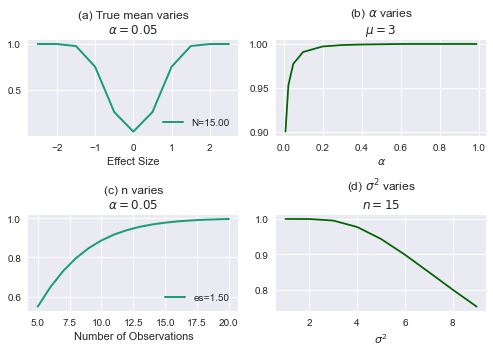

In [31]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(2,2,figsize = (7,5))
true_mean = np.array([(i-5) for i in range(11)])
TTestIndPower().plot_power(dep_var='effect_size',
                                 nobs= np.array([15]),
                                 effect_size=(true_mean-0)/2,
                                 alpha=0.05,
                                 ax=ax1, title='(a) True mean varies' + '\n' + r'$\alpha = 0.05$')

power_analysis = TTestIndPower()
all_p=[]
alpha = [0.01,0.025,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99]
for a in alpha:
    p = power_analysis.power(effect_size=1.5,nobs1=15, alpha = a, ratio = 1)
    all_p.append(p)

sns.lineplot(x = alpha, y=all_p, ax = ax2, color = 'darkgreen')
ax2.set_title(r'(b) $\alpha$'+' varies' + '\n' + r'$\mu = 3$')
ax2.set_xlabel(r'$\alpha$')
TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.array([i for i in range(5,21)]),
                                 effect_size=[1.5],
                                 alpha=0.05,
                                 ax=ax3, title='(c) n varies' + '\n' + r'$\alpha = 0.05$')

power_analysis = TTestIndPower()
all_p=[]
sigmas_ = [i for i in range(1,10)]
for s in sigmas_:
    p = power_analysis.power(effect_size=(3-0)/math.sqrt(s),nobs1=15, alpha = 0.05, ratio = 1)
    all_p.append(p)
sns.lineplot(x = sigmas_, y=all_p, ax = ax4, color = 'darkgreen')
ax4.set_title(r'(d) $\sigma^2$'+' varies' + '\n' + r'$n = 15$')
ax4.set_xlabel(r'$\sigma^2$')
plt.tight_layout()
plt.savefig('542hw3_q4.jpg',dpi=300)